# Exam 2 Review - Solutions

## <u>Case Study</u>: U.K. Smoker's Dataset

In this Exam 2 Review, we will explore our U.K. smoking dataset.

This dataset is comprised of a random sample of 421 smokers that live in the U.K.

The dataset contains information about the smokers including their:
* sex
* age
* marital status
* highest qualification
* nationality
* gross income
* region of the U.K. that live in.

The dataset also contains information about the habits of each of the smokers including:
* the amount of cigarettes that they smoke on the weekends
* the amount of cigarettes that they smoke on the weekdays
* the type of cigarettes that they smoke.




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import t, norm, f

import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Data Processing and Cleaning

### 1.1. Loading Data

Read the smoking.csv file into a dataframe.

In [3]:
df=pd.read_csv('smoking.csv')
df.head()

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets


### 1.2. Missing Value Checking

Does this dataset contain any missing values?

First we check the data types of each of the variables.

In [4]:
df.dtypes

sex                      object
age                       int64
marital_status           object
highest_qualification    object
nationality              object
gross_income             object
region                   object
smoke                    object
amt_weekends              int64
amt_weekdays              int64
type                     object
dtype: object

It look slike all of the intended numerical variables are represented as an int64 (or float64). Thus all of the values in these columns are read as numerical values and not string values. This indicates that there are no string values in these numerical columns that are used to represent a missing value (other than these values which are automatically converted to NaN: #N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.)
    
Let's inspect the categorical variables as well by looking at the unique values.

In [5]:
for col in ['sex', 'marital_status', 'highest_qualification', 'nationality', 'gross_income', 'region', 'smoke', 'type']:
    print('Unique values for the '+col+' column.')
    print(df[col].unique())
    print()

Unique values for the sex column.
['Female' 'Male']

Unique values for the marital_status column.
['Single' 'Married' 'Divorced' 'Widowed' 'Separated']

Unique values for the highest_qualification column.
['No Qualification' 'Degree' 'GCSE/CSE' 'GCSE/O Level' 'Other/Sub Degree'
 'A Levels' 'ONC/BTEC' 'Higher/Sub Degree']

Unique values for the nationality column.
['British' 'English' 'Welsh' 'Irish' 'Scottish' 'Other' 'Unknown'
 'Refused']

Unique values for the gross_income column.
['Under 2,600' 'Above 36,400' '2,600 to 5,200' '5,200 to 10,400' 'Refused'
 '15,600 to 20,800' '20,800 to 28,600' '10,400 to 15,600'
 '28,600 to 36,400' 'Unknown']

Unique values for the region column.
['The North' 'Midlands & East Anglia' 'London' 'South East' 'South West'
 'Wales' 'Scotland']

Unique values for the smoke column.
['Yes']

Unique values for the type column.
['Packets' 'Hand-Rolled' 'Both/Mainly Packets' 'Both/Mainly Hand-Rolled']



While we see that some of these categorical variables have a 'Unknown' value, we'd like to keep these values. Finally, let's check to make sure that there are no NaN values in all of our columns.

In [6]:
df.isna().sum()

sex                      0
age                      0
marital_status           0
highest_qualification    0
nationality              0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64

There are no NaN values in any of our columns. Thus, (as long as we don't consider 'Unknown' to be a 'missing value', this dataset does not contain any missing values.

## 2. Population Mean Inference

We would first like to conduct inference on the average number of cigarettes ALL UK smokers smoke on the weekends.

### 2.1. Conditions for Inference

First, check the conditions for conducting inference on this population mean.

1. The sample is randomly collected from the population of all U.K. smokers.
2. The sample size n=421 <10% of the UK smoker population. 
3. The sample size is n = 421 >30 OR <strike>the population distribution is normal</strike>

(We can infer that the population distribution of cigarettes smoked on the weekend by all U.K. smokers is not normal, because the sample distribution is not normal as shown in the histogram below).

Thus because the conditions are met, we are allowed to conduct inference on the population mean number of cigarettes smoked on the weekends for all of the UK smokers.

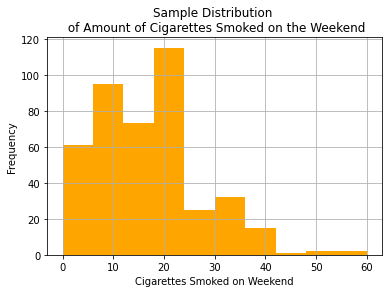

In [7]:
df['amt_weekends'].hist(color='orange')
plt.title('Sample Distribution \n of Amount of Cigarettes Smoked on the Weekend')
plt.xlabel('Cigarettes Smoked on Weekend')
plt.ylabel('Frequency')
plt.show()

### 2.2. 90% Confidence Interval
Next, calculate a 90% confidence interval for this population mean.

Because we don't know $\sigma$ (the population standard deviation), we must use $s$ instead of $\sigma$ and use the t distribution (with $df=n-1=421-1$ degrees of freedom) for the critical value instead of the z-distribution (ie. standard normal distribution).

In [8]:
#n
n=421
print('n:',n)

# sample mean
sample_mean=df['amt_weekdays'].mean()
print('sample mean:', sample_mean)


# sample standard deviation
sample_std=df['amt_weekdays'].std()
print('sample standard deviation:', sample_std)

n: 421
sample mean: 13.750593824228028
sample standard deviation: 9.388292145456372


In [9]:
# Critical Value
critical_value=t.ppf(0.95, df=n-1)
print('critical_value', critical_value)

critical_value 1.6484897130506961


In [10]:
# Confidence interval lower bound
cl_lower=sample_mean-critical_value*sample_std/np.sqrt(n)

# Confidence interval upper bound
cl_upper=sample_mean+critical_value*sample_std/np.sqrt(n)

print('90% Confidence Interval')
print(cl_lower,cl_upper)

90% Confidence Interval
12.996315219539397 14.50487242891666


### 2.3 Confidence Interval Interpretation

Put this confidence interval into words (ie. interpret it).

We are 90% confident that the average number of cigarattes smoked by all people in the UK on a weekend is between 12.996 and 14.505.

### 2.4. Confidence Interval Success Rate

If we were to collect 1000 random samples, each of size n=421 of UK smokers with replacement, and create a 90% confidence interval with each of these random samples for the average number of weekend cigarettes smoked by all UK smokers, what percent of these confidence intervals would we expect to contain the *actual* average number of weekend cigarettes smoked by all UK smokers?

900=0.90*1000

### 2.5 Hypothesis Testing
We would like to test if the average UK smoker smokes a number of weekend cigarattes that is different than the amount in a general pack of cigarettes (ie 20). 

#### 2.5.1. Hypotheses
Formulate the hypotheses that would test this claim.

$H_0: \mu=20$

$H_A: \mu\neq 20$

#### 2.5.2. Evaluating with the confidence interval

Evaluate these hypotheses with the 90% confidence interval.

The null value ($\mu=20$) is not inside the 90% confidence interval, therefore we reject the null hypothesis. Thus there is sufficient evidence to suggest that the average UK smoker smokes a number of weekend cigarettes that is not equal to 20.

### 2.5.3 Evaluating with a p-value

Evaluate these hypotheses using a p-value and and $\alpha=0.10$.

In [11]:
null_value=20

test_stat=(sample_mean-null_value)/(sample_std/np.sqrt(n))
test_stat

-13.658191720403268

In [12]:
p_value=2*(1-t.cdf(np.abs(test_stat), df=n-1))
p_value

0.0

Because the $p-value\approx 0<\alpha=.10$, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the average UK smoker smokes a number of weekend cigarettes that is not equal to 20.

## 3. Conceptual/Theory Questions

### 3.1 Standard Normal Distribution and t-distribution Theory/Properties Questions 

#### 3.1.1. Does the standard normal distribution or the t-distribution have thicker tails?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>



The t-distribution.

#### 3.1.2. In general, (all else held equal) which will produce a wider 95% confidence interval: one created with a critical value that is an observation from the standard normal (z) distribution or one created with a critical value that is an observation from the t-distribution?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

Because the t-distribution has thicker tails, the critical value (t) (and -t) have to be further away from the center of the distribution (ie 0) in order to encapsulate 95% in the middle. Thus the critical value (t) from the t-distribution will be larger than the critical value (Z) from the z-distribution. Thus the 95% confidence interval will be wider, all else held equal.

## 4. Population Mean Difference Inference

Next, we would first like to conduct inference on the difference between the average number of cigarettes ALL female UK smokers smoke on the weekends and the average number of cigarettes ALL male UK smokers smoke on the weekends.

### 4.1. Conditions for Inference
First, check the conditions on conducting infererence on the difference between the average number of cigarettes ALL female UK smokers smoke on the weekends and the average number of cigarettes ALL male UK smokers smoke on the weekends.

1. The sample of UK females is randomly collected from the population of all U.K. female smokers.
2. The sample size n=234 <10% of the UK female smoker population. 
3. The sample size of females is n = 234 >30 OR <strike>U.K. female population distribution of amount smoked on weekends is normal</strike>

4. The sample of UK males is randomly collected.
5. The sample size n=187 <10% of the UK males smoker population. 
6. The sample size of males is n = 187 >30 OR <strike>U.K. male population distribution of amount smoked on weekends is normal</strike>

7. We should also check that the males and females were collected independently in this study. (For instance, if the males and females in this sample were married to to eachother or siblings (for instance), then the male and female respondents would not be independent of each other).

Thus because the conditions are met, we are allowed to conduct inference on the difference between the average number of cigarettes ALL female UK smokers smoke on the weekends and the average number of cigarettes ALL male UK smokers smoke on the weekends.

*(We can infer that the male and female population distributions are not normal because the male and female sample distributions are not normal as shown in the histograms below).*

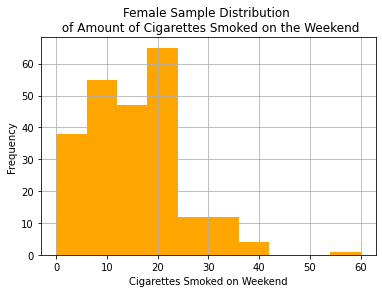

In [13]:
df['amt_weekends'][df['sex']=='Female'].hist(color='orange')
plt.title('Female Sample Distribution \n of Amount of Cigarettes Smoked on the Weekend')
plt.xlabel('Cigarettes Smoked on Weekend')
plt.ylabel('Frequency')
plt.show()

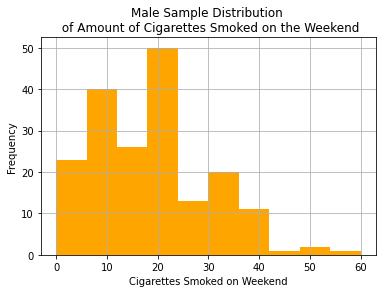

In [14]:
df['amt_weekends'][df['sex']=='Male'].hist(color='orange')
plt.title('Male Sample Distribution \n of Amount of Cigarettes Smoked on the Weekend')
plt.xlabel('Cigarettes Smoked on Weekend')
plt.ylabel('Frequency')
plt.show()

### 4.2. 99% Confidence Interval
Next, calculate a 99% confidence interval for this population mean difference.

Because we don't know $\sigma_f$ and $\sigma_m$ (the population standard deviations), we must use $s_f$ and $s_m$ instead and use the t distribution (with $df=min(n_f-1,n_m-1)=min(234-1,187-1)=186$ degrees of freedom) for the critical value instead of the z-distribution (ie. standard normal distribution).

In [15]:
df['sex'].value_counts()

Female    234
Male      187
Name: sex, dtype: int64

In [16]:

#n
nf=234
nm=187
print('nf: ',nf)
print('nm: ',nm)


# Critical Value
critical_value=t.ppf(0.995, df=186)
print('critical_value', critical_value)

# sample mean
sample_mean_f=df[df['sex']=='Female']['amt_weekdays'].mean()
print('sample mean females', sample_mean_f)
sample_mean_m=df[df['sex']=='Male']['amt_weekdays'].mean()
print('sample mean males', sample_mean_m)

# sample standard deviation
sample_std_f=df[df['sex']=='Female']['amt_weekdays'].std()
print('sample standard deviation females', sample_std_f)
sample_std_m=df[df['sex']=='Male']['amt_weekdays'].std()
print('sample standard deviation male', sample_std_m)

# standard error
se=np.sqrt(sample_std_f**2/nf+sample_std_m**2/nm)
print('standard error', se)

nf:  234
nm:  187
critical_value 2.6025196219606745
sample mean females 12.02991452991453
sample mean males 15.903743315508022
sample standard deviation females 7.353370836127316
sample standard deviation male 11.086237564277981
standard error 0.942508026367131


In [17]:
# Confidence interval lower bound
cl_lower=(sample_mean_f-sample_mean_m)-critical_value*se

# Confidence interval upper bound
cl_upper=(sample_mean_f-sample_mean_m)+critical_value*se

print('99% Confidence Interval')
print(cl_lower,cl_upper)

99% Confidence Interval
-6.32672441806938 -1.4209331531176046


### 4.3. Put this confidence interval into words (ie. interpret it).

We are 99% confident that the difference in the average number of cigarattes smoked by all females in the UK on a weekend and the average number of cigarattes smoked by all males in the UK on a weekend is between -6.327 and -1.421.

### 4.4 Hypothesis Testing
We would like to test if there is a difference in the average number of weekend cigarettes females in the UK smoke vs the average number of weekend cigarettes males in the UK smoke. 

#### 4.4.1. Hypotheses
Formulate the hypotheses that would test this claim. Make sure that you define any parameters that you use.

$H_0: \mu_f-\mu_m=0$

$H_A: \mu_f-\mu_m\neq 0$

* $\mu_F$ = the average number of cigarettes that all female U.K. smokers smoke on the weekends
* $\mu_M$ = the average number of cigarettes that all male U.K. smokers smoke on the weekends

#### 4.4.2 Evaluate these hypotheses with the 99% confidence interval.

The null value ($\mu_{f}-\mu_m=0$) is not inside the 99% confidence interval, therefore we reject the null hypothesis. Thus there is sufficient evidence to suggest  there is a difference in the average number of weekend cigarettes females in the UK smoke vs the average number of weekend cigarettes males in the UK smoke. In other words, there is sufficient evidence to suggest that there is an association between sex and weekend smoking habits in the UK.

#### 4.4.3 Evaluate these hypotheses using a p-value and $\alpha=0.01$.

In [18]:
test_stat=((sample_mean_f-sample_mean_m)-0)/se
print('Test Statistic', test_stat)

Test Statistic -4.11012816572507


In [19]:
p_value=2*(1-t.cdf(np.abs(test_stat), df=186))
print('p-value', p_value)

p-value 5.925187558109002e-05


Because the $p-value\approx 0 <\alpha=.01$, we reject the null hypothesis. Thus there is sufficient evidence to there is a difference in the average number of weekend cigarettes females in the UK smoke vs the average number of weekend cigarettes males in the UK smoke. In other words, there is sufficient evidence to suggest that there is an association between sex and weekend smoking habits in the UK.

## 5. Population Proportion Inference

We would first like to conduct inference on the proportion of all UK smokers that smoke packets.

### 5.1. 95% Confidence Interval

First, we would like to create a confidence interval for the proportion of all U.K. smokers that smoke packets. **First, let's assume that we will not be using this confidence interval to evaluate any hypotheses.**

#### 5.1.1 Conditions for the Confidence Interval
First, check the conditions for creating a confidence interval (first assuming we have no hypothesis we'd like to test).

<u>Because we are not assuming that there is a hypothesis test (yet), we will use $\hat{p}$ (in place of $p$ which we don't know) in the conditions as well as the standard error.</u>

1. The sample is randomly collected from the population of all UK smokers.
2. The sample size n=421 <10% of the UK smoker population. 
3. The sample size is $np \approx n\hat{p} = 421(0.705) \geq 10$ and $n(1-p)\approx n(1-\hat{p})=421(1-\hat{p})\geq 10$


Thus because the conditions are met, we are allowed to create a confidence interval for the proportion of all UK smokers that smoke packets.

In [20]:
sample_proportion = df[df['type']=='Packets'].shape[0]/df.shape[0]
sample_proportion

0.7054631828978623

#### 5.1.2. Next, calculate a 95% confidence interval for this population proportion.

We use the z-distribution for inference on a population proportion.

In [21]:
#n
n=421
print('n',n)


# Critical Value
critical_value=norm.ppf(0.975)
print('critical_value', critical_value)

# sample proportion
sample_proportion=(df['type']=='Packets').sum()/n
print('sample proportion', sample_proportion)

# standard error
se=np.sqrt(sample_proportion*(1-sample_proportion)/n)
print('standard error', se)

n 421
critical_value 1.959963984540054
sample proportion 0.7054631828978623
standard error 0.022216002902696867


In [22]:
# Confidence interval lower bound
cl_lower=sample_proportion-critical_value*se

# Confidence interval upper bound
cl_upper=sample_proportion+critical_value*se

print('95% Confidence Interval')
print(cl_lower,cl_upper)

95% Confidence Interval
0.6619206173281391 0.7490057484675854


#### 5.1.3 Put this confidence interval into words (ie. interpret it).

We are 99% confident that the proportion of UK smokers that smoke packets is between 66.19% and 74.90%.

### 5.2. Hypothesis Testing

#### 5.2.1. Next, we would like to test if the proportion of UK smokers smoke packets is different from 70%. Formulate the hypotheses that would test this claim.

Make sure that you define any parameters that you use.

$H_0: p=0.7$

$H_A: p \neq 0.7$

$p=$ the proportion of all U.K. smokers that smoke packets

#### 5.2.2. Next, check the conditions for conducting this hypothesis test.

<u>Because in our hypothesis tests we assume $H_0: p=0.7$, we will assume that $p=0.7$ in the conditions as well as the standard error in this hyopthesis test.</u>

1. The sample is randomly sampled from the population of all UK smokers.
2. The sample size n=421 <10% of the UK smoker population. 
3. The sample size is $np=np_0 = 421(0.70) \geq 10$ and $n(1-p)=n(1-p_0)=421(1-0.70)\geq 10$


Thus because the conditions are met, we are allowed to conduct this hypothesis test.

#### 5.2.3. Next, calculate a 95% confidence interval for this population proportion, *that will be used to evaluate our hypotheses above.*

This will be the same calculations as before, except now we will use the null value $p=p_0=0.70$ in the standard error (instead of the sample proportion $\hat{p}$.)

In [23]:
#null value
p_0=0.70

In [24]:

#n
n=421
print('n',n)

# Critical Value
critical_value=norm.ppf(0.975)
print('critical_value', critical_value)

print('null value', p_0)

# standard error
se=np.sqrt(p_0*(1-p_0)/n)
print('standard error', se)

n 421
critical_value 1.959963984540054
null value 0.7
standard error 0.02233410735946129


In [25]:
# Confidence interval lower bound
cl_lower=sample_proportion-critical_value*se

# Confidence interval upper bound
cl_upper=sample_proportion+critical_value*se

print('99% Confidence Interval')
print(cl_lower,cl_upper)

99% Confidence Interval
0.6616891368464671 0.7492372289492574


#### 5.2.4. Evaluate these hypotheses with the 95% confidence interval.

The null value ($p=0.70$) is inside the 95% confidence interval, therefore we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that the proportion of UK smokers that smoke packets is different from 70%.

#### 5.2.5. Evaluate these hypotheses using a p-value and $\alpha=0.05$.

In [26]:
test_stat=(sample_proportion-.7)/se
test_stat

0.2446116520321979

In [27]:
p_value=2*(1-norm.cdf(np.abs(test_stat)))
p_value

0.8067571410919188

Because the $p-value=0.807\geq \alpha=.05$, we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that the proportion of UK smokers that smoke packets is different from 70%.

## 6. Population Proportion Difference Inference

Next we would like to see if there is a difference in the proportion of Scottish smokers that smoke packets and the proportion of non-Scottish smokers that smoke packets.

### 6.1. New Columns

First create a new column in a dataframe that labels each U.K. smoker as either 'Scottish' or 'Not_Scottish'.

Second, create a new column in a dataframe that labels each U.K. smoker as somking either 'Packets' or 'Not_Packets'.


In [28]:
df['nationality'].value_counts()

English     202
British     129
Scottish     45
Welsh        16
Other        14
Irish        11
Refused       3
Unknown       1
Name: nationality, dtype: int64

In [29]:
df['is_scottish']=df['nationality'].map({'Scottish': 'Scottish', 'English': 'Not_Scottish', 'British': 'Not_Scottish',
                                         'Welsh': 'Not_Scottish', 'Other': 'Not_Scottish', 'Irish': 'Not_Scottish', 
                                        'Refused': 'Not_Scottish', 'Unknown': 'Not_Scottish'})

In [30]:
df['type'].value_counts()

Packets                    297
Hand-Rolled                 72
Both/Mainly Packets         42
Both/Mainly Hand-Rolled     10
Name: type, dtype: int64

In [31]:
df['is_packet']=df['type'].map({'Packets': 'Packets', 'Hand-Rolled': 'Not_Packets',
                                'Both/Mainly Packets': 'Not_Packets', 'Both/Mainly Hand-Rolled': 'Not_Packets'})

df.head()

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type,is_scottish,is_packet
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets,Not_Scottish,Packets
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets,Not_Scottish,Packets
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled,Not_Scottish,Not_Packets
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets,Not_Scottish,Packets
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets,Not_Scottish,Packets


### 6.2. Checking Conditions
Now, check the conditions for creating a confidence interval for the difference in the proportion of Scottish citizens that smoke packets vs the proportion of non-Scottish citizens that smoke packets.

1. The sample Scottish citizens that smoke is randomly collected from the population of Scottish smokers.
2. The sample size $n_{scot}=45 <10$% of all Scottish citizens that smoke. 
3. $n_{scot}p_{scot}\approx n_{scot}\hat{p}_{scot} = 45(.73) \geq 10$ and $n_{scot}(1-\hat{p}_{scot})\approx n_{scot}(1-p_{scot}) = 45(1-.73) \geq 10$

4. The sample non-Scottish citizens that smoke is randomly collected from the pouplation of non-Scottish UK smokers.
5. The sample size $n_{nonscot}=376 <10$% of all non-Scottish citizens that smoke. 
6. $n_{nonscot}\hat{p}_{nonscot} = 376(.70) \geq 10$ and $n_{nonscot}(1-\hat{p}_{nonscot}) = 376(1-.70) \geq 10$

7. The observtions in the sample of Scottish citizens that smoke is independent of the observations in the sample of non-Scottish citizens that smoke.

Thus because the conditions are met, we are allowed to conduct inference on the difference in the proportion of ALL Scottish citizens that smoke packets vs the proportion of ALL non-Scottish citizens that smoke packets.

In [32]:
df['is_scottish'].value_counts()

Not_Scottish    376
Scottish         45
Name: is_scottish, dtype: int64

In [33]:
df_cross=pd.crosstab(df['is_scottish'], df['is_packet'], normalize='index')
df_cross

is_packet,Not_Packets,Packets
is_scottish,,
Not_Scottish,0.297872,0.702128
Scottish,0.266667,0.733333


### 6.3 Now create a 92% confidence interval for the difference in the proportion of Scottish citizens that smoke packets vs the proportion of non-Scottish citizens that smoke packets.

We always use the z-distribution for inference on a population proportion differences.

In [34]:

#n
n_scot=45
n_not_scot=376
print('n_scot',n_scot)
print('n_not_scot',n_not_scot)

# Critical Value
critical_value=norm.ppf(0.96)
print('critical_value', critical_value)

# sample proportions
sample_prop_scot=df_cross['Packets']['Scottish']
print('sample_prop_scot', sample_prop_scot)
sample_prop_non_scot=df_cross['Packets']['Not_Scottish']
print('sample_prop_non_scot', sample_prop_non_scot)


# standard error
se=np.sqrt((sample_prop_scot*(1-sample_prop_scot))/n_scot +   (sample_prop_non_scot*(1-sample_prop_non_scot))/n_not_scot)
print('standard error', se)

n_scot 45
n_not_scot 376
critical_value 1.7506860712521692
sample_prop_scot 0.7333333333333333
sample_prop_non_scot 0.7021276595744681
standard error 0.0700136711170732


In [35]:
# Confidence interval lower bound
cl_lower=(sample_prop_scot-sample_prop_non_scot)-critical_value*se

# Confidence interval upper bound
cl_upper=(sample_prop_scot-sample_prop_non_scot)+critical_value*se

print('92% Confidence Interval')
print(cl_lower,cl_upper)

92% Confidence Interval
-0.09136628506302517 0.15377763258075555


### 6.4. Put this confidence interval into words (ie. interpret it).

We are 92% confident that the difference in the proportion of Scottish smokers that smoke packets and the proportion of non-Scottish smokers that smoke packets is between -9.1% and 15.4%.

### 6.5. Hypothesis Testing

We would like to test if ther is a difference in the proportion of Scottish smokers that smoke Packets is different than the proportion of non-Scottish smokers that smoke packets. 

#### 6.5.1. Formulate these hypotheses.

Make sure you define any parameters that you use.

$H_0: p_{scot}-p_{nonscot}=0$

$H_A: p_{scot}-p_{nonscot}\neq 0$

* $p_{scot}$ the proportion of all Scottish smokers that smoke packets
* $p_{nonscot}$ the proportion of all non-Scottish U.K. smokers that smoke packets

### 6.6. Evaluate these hypotheses with the 92% confidence interval.

The null value ($\mu_{scot}-\mu_{nonscot}=0$) is in the 92% confidence interval, therefore we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that there is a difference in the proportion of Scottish smokers that smoke Packets is different than the proportion of non-Scottish smokers that smoke packets. In other words, there is not sufficient evidence to suggest that there is an association with being Scottish and smoking Packets.

### 6.7. Evaluate these hypotheses using a p-value and $\alpha =0.08$.

In [36]:
null_value=0

test_stat=((sample_prop_scot-sample_prop_non_scot)-null_value)/se
test_stat

0.44570829183752825

In [37]:
p_value=2*(1-norm.cdf(np.abs(test_stat)))
p_value

0.6558079742088874

Because the $p-value=0.656\geq \alpha=.08$, therefore we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that there is a difference in the proportion of Scottish smokers that smoke Packets is different than the proportion of non-Scottish smokers that smoke packets. In other words, there is not sufficient evidence to suggest that there is an association with being Scottish and smoking Packets.

## 7. Linear Regression Model


Next we would like to formulate a linear regression model modeling a response variable of amt_weekends with the following explanatory variables:
* amt_weekdays
* age
* sex
* and interaction of age and sex

### 7.1. Fit the model

First, fit this linear regression model, display the summary output table, and write out the linear regression equation. Make sure you use the correct notation.

In [38]:
full_model = smf.ols('amt_weekends ~ amt_weekdays  + age + sex +age*sex', 
               data=df).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     195.8
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           3.22e-94
Time:                        21:07:02   Log-Likelihood:                -1338.9
No. Observations:                 421   AIC:                             2688.
Df Residuals:                     416   BIC:                             2708.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8249      1.126      6.064      0.000       4.613       9.037
sex[T.Male]         0.5727      1.627      0.352      0.725      -2.625       3.771
amt_weekdays        0.8685      0.032     27.217      0.000       0.806       0.931
age                -0.0538      0.024     -2.247      0.025      -0.101      -0.007
age:sex[T.Male]    -0.0163      0.036     -0.457      0.648      -0.087       0.054
==============================================================================
Omnibus:                       98.192   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2471.956
Skew:                           0.237   Prob(JB):                         0.00
Kurtosis:                      14.861   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{amtweekend} = 6.82+.5727*(sexmale) + .8685*amtweekdays -0.0538*age -0.0163*(age*sexmale)$

### 7.2. Predict the number of cigarettes a 25 year old male smokes on the weekend, that smokes 10 cigarettes on the weekdays, BY HAND.

In [39]:
amt_weekend = 6.82+.5727*(1) + .8685*10 -0.0538*25 -0.0163*(25*1)
amt_weekend

14.325199999999999

### 7.3. Then make this prediction with Python.

In [40]:
full_model.predict(exog=dict(age=25, amt_weekdays=10, sex='Male'))

0    14.330227
dtype: float64

### 7.4. Model Fit

What percent of variability of the amount of weekend cigarettes smoked in the sample is explained by the model? What percent of variability of the amount of weekend cigarettes smoked in the sample is NOT explained by the model?

* The percent of variability of the amount of weekend cigarettes smoked in the sample that is explained by the model = $R^2 = 0.653$.
* The percent of variability of the amount of weekend cigarettes smoked in the sample that is NOT explained by the model = $1-R^2 = 1- 0.653=0.347$.

### 7.5. Intercept Interpretation

Put the intercept of this model into words. **Make sure to not use causal language!**

**We would expect** the amount of weekend cigarettes smoked by a 0-year-old female U.K. smoker who smokes 0 cigarettes on the weekdays to be 6.8, **on average**.

The bolded statements above phrase our interpretation such that we are not implying a causal relationship. *For instance we would **not want to say** that the amount of weekend cigarettes smoked by a 0-year-old female U.K. smoker who smokes 0 cigarettes on the weekdays **will be** 6.8.*

### 7.6. Numerical Slope Interpretation

Put the age slope into words. **Make sure to not use causal language!**

<u>All else held equal</u>, if we were to increase the age of a UK smoker to by year, **we would expect** the amount of cigarettes smoked on the weekend to decrease by 0.0538, **on average**.


The bolded statements above phrase our interpretation such that we are not implying a causal relationship. *For instance we would **not want to say**: <u>all else held equal</u>, if we were to increase the age of a UK smoker to by year, the amount of cigarettes smoked on the weekend **will** decrease by 0.0538.*


### 7.7. Indicator Variable Slope Interpretation

Put the sex[Male] slope into words. **Make sure to not use causal language!**

<u>All else held equal</u>, **we would expect** the **average** amount of weekend cigarettes smoked by U.K. males to be 0.57 cigarettes higher than the **average** amount of weekend cigarettes smoked by UK females.


The bolded statements above phrase our interpretation such that we are not implying a causal relationship. *For instance we would **not want to say**: <u>All else held equal</u>, the amount of weekend cigarettes smoked by U.K. males **is** 0.57 cigarettes higher than amount of weekend cigarettes smoked by UK females.*

### 7.8. Next, check the linear regression conditions.

(If they are not met, we will proceed with caution and conduct inference on our population slopes anyway).

1. **Linearity Condition**: This condition looks mostly met. For most x-axis windows (going left to right) in the fitted values vs. residuals plot below, we see that the points are mostly equally distributed above and below the line.

2. **Constant Variance of Residuals Condition:** This condition, however is not met. We see that the y-axis spread changes as we move from left to right in the fitted values vs. residuals plot below

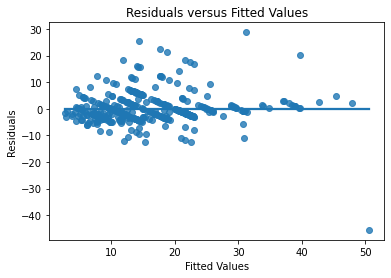

In [41]:
# residual plot for inital check on the model fit
sns.regplot(x=full_model.fittedvalues, y=full_model.resid, ci=None)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

3. **Normally Distributed Residuals and Mean of 0 Condition':** This condition looks like it is mostly met as the histogram is mostly symmetric, unimodal, and centered at 0.

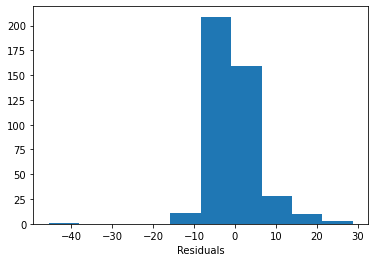

In [42]:
plt.hist(full_model.resid)
plt.xlabel('Residuals')
plt.show()

4. **Independence of Residuals Condition**

Because the sample of U.K. Smokers is random and $n<10$% of all U.K. smokers, we know that this condition is not violated in this particular way.

5. **No Multi-Collinearity Condition**: The two numerical explanatory variables (age and amt_weekdays) do not have a strong linear relationship. Thus the explanatory variables are not collinear and so this condition (just for multiple linear regression) is met.

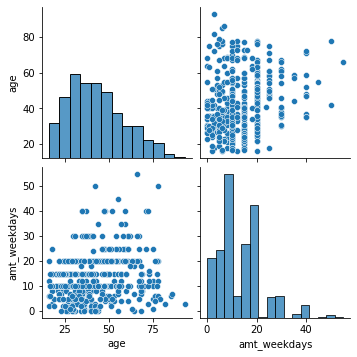

In [43]:
sns.pairplot(df[['age', 'amt_weekdays']])
plt.show()

In [44]:
df[['age', 'amt_weekdays']].corr()

,age,amt_weekdays
age,1.000000,0.192783
amt_weekdays,0.192783,1.000000


## 8. Linear Regression Inference

### 8.1. Sample Association between Sex, Age, and Cigarettes Smoked on the Weekends

* First, create a single scatterplot, visualizing the relationship between age and the amount of cigarettest smoked on the weekends in this dataset.
* In this scatterplot, color code the points by sex.
* Finally, fit a linear regression line for each of the sex levels in this dataset.

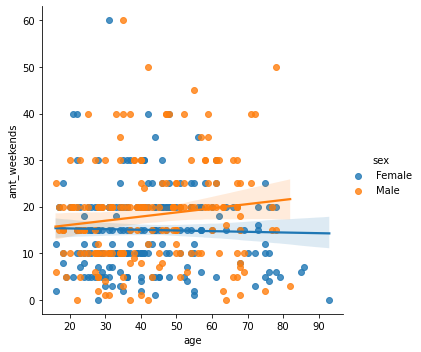

In [45]:
sns.lmplot(x='age', y='amt_weekends', hue='sex', data=df)
plt.show()

### 8.2. Inference for the Interaction Variable Slope

The two different slopes for female and male in this scatterplot above are different for the sample data, when predicting amt_weekends with age. But do we have enough evidence to suggest that the female and male slopes will be different when predicting amt_weekends with *age, sex, and amt_weekdays* **in the population linear regression model**?

Or in other words, do we have sufficient evidence to suggest that $\beta_4$, the slope that corresponds to the interaction of age and sex is non-zero in the population linear regression model?

#### 8.2.1 Hypotheses

Forumulate these hypotheses which would test this below. Define any parameters that you use.

$H_0: \beta_4=0$

$H_A: \beta_4\neq 0$

$\beta_4$ = the slope that corresopnds to the interaction of age and sex in the corresponding population linear regression model.

#### 8.2.2. 95% Confidence Interval

Create a 95% confidence interval for this population slope.

Remember, for inference on population slopes in a LINEAR regression equation, we use the t-distribution with $df=n-p-1 = 421 - 4-1 = 416$.

(p=number of slopes)

In [46]:
#n
n=421
print('n',n)

#p
p=4
print('Number of slopes = p',p)


# Critical Value
critical_value=t.ppf(0.975, df=n-p-1)
print('critical_value', critical_value)

#Sample slope
sample_slope=-0.0163

#Standard Error
se=0.036

# Confidence interval lower bound
cl_lower=sample_slope-critical_value*se

# Confidence interval upper bound
cl_upper=sample_slope+critical_value*se

print('95% Confidence Interval')
print(cl_lower,cl_upper)

n 421
Number of slopes = p 4
critical_value 1.965682904909613
95% Confidence Interval
-0.08706458457674605 0.054464584576746064


#### 8.2.3. Evaluate your hypotheses with your 95% confidence interval.

Because the null value ($\beta_4=0$) is in the confidence interval, we fail to reject the null hypothesis. Thus, there is not sufficient evidence to suggest that the population slope associated with the interaction between age and sex in this model is non-zero.

#### 8.2.4. Calculate the test statistic and the p-value for these hypotheses "by hand". 

You can use scipy.stats functions.

In [47]:
point_estimate = -0.0163
se=0.036
null_value=0


test_stat = (point_estimate-null_value)/se
test_stat

-0.4527777777777778

In [48]:
pvalue = 2*(1-t.cdf(np.abs(test_stat), df=n-p-1))
pvalue

0.6509448089869632

#### 8.2.5. Evaluate your hypotheses with your p-value and a significance level of $\alpha=0.05.$.

Because $p-value = 0.65\geq \alpha =0.05$, we fail to reject the null hypothesis. Thus, there is not sufficient evidence to suggest that the population slope associated with the interaction between age and sex in this model is non-zero.

### 8.3. Probability of Making Type 1 Errors

If we were conduct a hypothesis test on each of our 4 population slopes in this model (evaluating whether the population slope was equal to or not equal to 0), what would be the likelihood that NONE of our four hypothesis tests made a type 1 error? (Suppose we decided to use a significance level of $\alpha =0.10$ for each of these four tests).

There are 4 slopes in our full model. Thus we would individually test the following four hypotheses one at a time.

$H_0: \beta_1=0$

$H_A: \beta_1\neq 0$

$H_0: \beta_2=0$

$H_A: \beta_2\neq 0$

$H_0: \beta_3=0$

$H_A: \beta_3\neq 0$

$H_0: \beta_4=0$

$H_A: \beta_4\neq 0$

If we were to use a significance level of $\alpha=0.10$ for a given test, then the probability that that test would make a type 1 error is 0.10. Thus, the probability that the test did NOT make a type 1 error would be 0.90.

If we assume that each of these tests are independent, this would mean that the probability of NONE of our hypothesis test made a type 1 error would be:

$P(\mbox{none made type 1 error})$ = $P(\mbox{test 1 did not make type 1 error AND test 2 did not make type 1 error AND test 3 did not make type 1 error AND test 4 did not make type 1 error})$

$=P(\mbox{test 1 did not make type 1 error) P(test 2 did not make type 1 error)P(test 3 did not make type 1 error)P(test 4 did not make type 1 error})$

$=(0.90)(0.90)(0.90)(0.90) = 0.651$

In [49]:
.9**4

0.6561

### 8.4. Hypothesis Test for ALL Slopes

Now we would like to test (in just one test) if there is sufficient evidence to suggest at least one population slope is non-zero in the corresponding population model.

#### 8.4.1. Hypotheses
Set up the hypotheses for this test.

$H_0: \beta_1=\beta_2=\beta_3=\beta_4=0$

$H_A:$ at least one of these slopes is non-zero


#### 8.4.2 Test statistic

What is the test statistic for this test?

The summary output table tells us that this test statistic is 188.4.

In [50]:
test_stat=195.8
test_stat

195.8

#### 8.4.3. p-value

Use your test statistic and calculate the p-value "by hand". (You can verify your answer in the summary output table, however it may be slightly different due to rounding errors).

In [51]:
pvalue= 1-f.cdf(test_stat, dfn=p, dfd=n-p-1)

pvalue

1.1102230246251565e-16

#### 8.4.4. Evaluate your hypotheses with this p-value and a significance level of $\alpha=0.10$.

Because the $p-value = 1.11\times 10^{-16}<\alpha =0.10$, we reject the null hypothesis, thus there is sufficient evidence to suggest that at least one of these four population slopes is non-zero in the population model.

#### 8.4.5. What is the probabiliy that we did not make a type 1 error in this hypothesis test?

Because $\alpha = 0.10$, the probability that we made a type 1 error in this single hypothesis test is 0.10. Thus the probability that we did not make a type 1 error in this test is 0.90.